# TASK 6.4 - Supervised Machine Learning: Regression

#### Table of Content

1. Importing Libraries & Options
2. Importing Dataframe
3. Checking the Data
4. Hypothesis & Scatterplot (A)
5. Regression Analysis (A)
6. Performance Improvement (A)
7. Hypothesis & Scatterplot (B)
8. Regression Analysis (B)
9. Performance Improvement (B)

# 1. Importing Libraries & Options


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Prompting matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Removing the max column cap

pd.options.display.max_columns = None

# 2. Importing Dataframe

In [4]:
# Creating a path for main dataframe

path = '/Users/charliegehant/Dropbox/4. Career Foundry/Achievement 6 - Advanced Analytics & Dashboard Design/04-2022 Airbnb Analysis/02 Data'

In [5]:
# Importing dataframe

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'listings_clean.csv'), index_col = False)

# 3. Checking the Data

In [6]:
df.head()

,id,host_id,host_since,host_response_time,host_resp_rate_pct,host_accept_rate_pct,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price_usd,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,54730,2009-11-16,within a few hours,100,85,f,3.0,t,t,Islington,51.56861,-0.11270,Private room in rental unit,Private room,2,1 shared bath,1.0,1.76,65.0,1,29,t,26,56,86,361,22,1,1,2010-08-18,2021-11-21,4.86,4.80,4.85,4.80,4.90,4.65,4.75,f,2,1,1,0,0.16
1,15400,60302,2009-12-05,within a day,67,50,f,1.0,t,t,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.00,75.0,3,50,t,0,0,0,4,89,0,0,2009-12-21,2020-03-16,4.79,4.84,4.88,4.87,4.82,4.93,4.73,f,1,1,0,0,0.61
2,17402,67564,2010-01-04,within an hour,80,70,f,18.0,t,t,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,6,2 baths,3.0,3.00,265.0,4,365,t,4,34,60,295,43,1,0,2011-03-21,2021-06-28,4.69,4.80,4.68,4.66,4.66,4.85,4.59,f,1,1,0,0,0.33
3,17506,67915,2010-01-05,Unknown,89,75,f,3.0,t,t,Hammersmith and Fulham,51.47935,-0.19743,Private room in townhouse,Private room,2,1 private bath,1.0,1.00,150.0,3,21,t,29,59,89,364,0,0,0,1900-01-01,1900-01-01,4.54,4.73,4.62,4.79,4.80,4.75,4.64,f,2,0,2,0,4.64
4,25123,103583,2010-04-05,Unknown,89,75,f,3.0,t,t,Barnet,51.57438,-0.21081,Private room in residential home,Private room,2,1.5 shared baths,1.0,1.76,29.0,10,1120,t,0,0,0,0,129,0,0,2010-04-14,2020-03-15,4.78,4.70,4.94,4.91,4.89,4.45,4.74,t,3,0,3,0,0.91


In [7]:
df.shape

(66582, 45)

##### • PLEASE NOTE: From previous cleaning steps, I know the dataframe has no NaN values and no duplicates.

# 4. Hypothesis & Scatterplot (A)

> ### HYPOTHESIS: "If a host has a higher response rate, then they will have better communication rating."

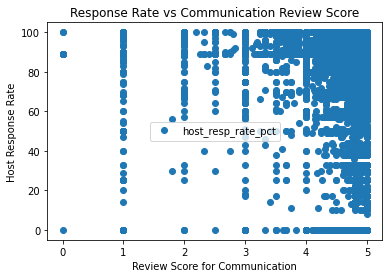

In [8]:
# Creating a scatterplot to explore the relationship between communication rating & host response rate. 

df.plot(x = 'review_scores_communication', y = 'host_resp_rate_pct',style='o')
plt.title('Response Rate vs Communication Review Score')  
plt.xlabel('Review Score for Communication')  
plt.ylabel('Host Response Rate')  
plt.show()

/Users/charliegehant/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='review_scores_communication', ylabel='Density'>

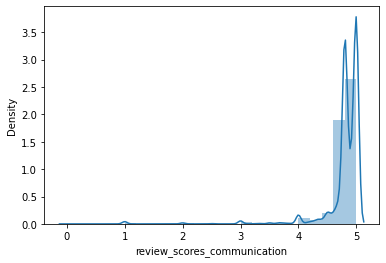

In [9]:
# Looking for extreme values

sns.distplot(df['review_scores_communication'], bins=25)

In [10]:
df['review_scores_communication'].median()

4.85

In [11]:
# Most listings have are reviewed 4.80 or higher

df['review_scores_communication'].describe()

count    66582.000000
mean         4.805562
std          0.391993
min          0.000000
25%          4.800000
50%          4.850000
75%          5.000000
max          5.000000
Name: review_scores_communication, dtype: float64

/Users/charliegehant/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='host_resp_rate_pct', ylabel='Density'>

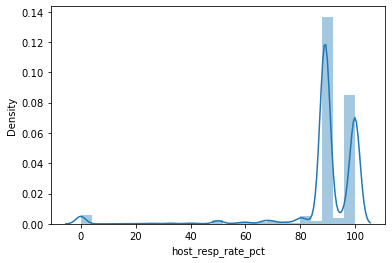

In [12]:
# Looking for extreme values

sns.distplot(df['host_resp_rate_pct'], bins=25)

In [13]:
df['host_resp_rate_pct'].median()

89.0

In [14]:
# Most hosts have a response rate of 89% or higher

df['host_resp_rate_pct'].describe()

count    66582.000000
mean        89.018278
std         16.778037
min          0.000000
25%         89.000000
50%         89.000000
75%        100.000000
max        100.000000
Name: host_resp_rate_pct, dtype: float64

# 5. Regression Analysis (A)

##### PREPARING THE DATA

In [15]:
# Step 1: Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df['review_scores_communication'].values.reshape(-1,1)
y = df['host_resp_rate_pct'].values.reshape(-1,1)

In [16]:
# Step 2: Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##### REGRESSION ANALYSIS

In [17]:
# Creating a regression object.

regression = LinearRegression() 

In [18]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

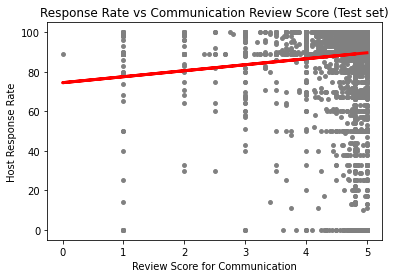

In [20]:
# Creating a plot that shows the regression line from the model on the test set.
# It seems the correlation, although postive, is not very strong.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Response Rate vs Communication Review Score (Test set)')
plot_test.xlabel('Review Score for Communication')
plot_test.ylabel('Host Response Rate')
plot_test.show()

In [21]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [22]:
# Printing the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.02834561]]
Mean squared error:  285.16477026029946
R2 score:  0.003308408844782007


### COMMENTS

> ##### The slope is positive, therefore there is a positive relationship between Host Response Rate & Review Score for Communication.

> ##### The MSE is very high, meaning the regression line is a poor representation of the data.

> ##### The R2 score is very low, 0.3%, which means the model is a poor fit. 

##### COMPARING ACTUAL & PREDICTED VALUES

In [23]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,89,89.613974
1,89,89.311140
2,89,89.613974
3,100,88.614620
4,89,88.614620
5,94,87.251865
6,100,89.613974
7,100,85.586275
8,100,89.008305
9,100,88.735754


##### COMPARING HOW THE REGRESSION FITS THE TRAINING SET

In [24]:
# Predicting X_train

y_predicted_train = regression.predict(X_train)

In [25]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.02834561]]
Mean squared error:  278.11357968600237
R2 score:  0.005034620894046715


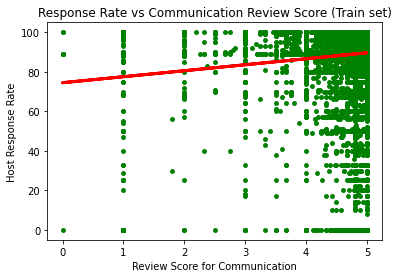

In [27]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Response Rate vs Communication Review Score (Train set)')
plot_test.xlabel('Review Score for Communication')
plot_test.ylabel('Host Response Rate')
plot_test.show()

### COMMENTS

> ##### Altogether my hypothesis is false and has been rejected / proven wrong, even though I was convinced host reponse time and review score for communication would strongly correlate. 

> ##### I feel like the instant bookable feature (which then does not require the host reponse) may change the results. Moreover, I feel like looking only at the "normal data" may give me a clearer picture. 

> ##### "Normal data" = 'review_scores_communication' >= 4.80 & 'host_resp_rate_pct' >= 89

# 6. Performance Improvement (A)

### Refining Data & Removing Outliers 

In [28]:
# Droping all instant bookable bookings (which do not require communication form host)

df_no_ib = df.drop(df[(df['instant_bookable'] == 't')].index)

In [29]:
# Checking data (before)

df['instant_bookable'].value_counts()

f    44289
t    22293
Name: instant_bookable, dtype: int64

In [30]:
# Checking data (after)

df_no_ib['instant_bookable'].value_counts()

f    44289
Name: instant_bookable, dtype: int64

In [31]:
# Isolating only ratings equal or above 4.80

df_2 = df_no_ib[df_no_ib['review_scores_communication'] >= 4.80]

In [32]:
# Isolating only response rate equal or above 89%

df_3 = df_2[df_2['host_resp_rate_pct'] >= 89]

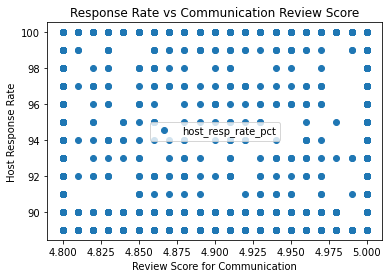

In [33]:
# Creating a scatterplot to explore the relationship between variables. 

df_3.plot(x = 'review_scores_communication', y = 'host_resp_rate_pct',style='o')
plt.title('Response Rate vs Communication Review Score')  
plt.xlabel('Review Score for Communication')  
plt.ylabel('Host Response Rate')  
plt.show()

In [34]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df_3['review_scores_communication'].values.reshape(-1,1)
y = df_3['host_resp_rate_pct'].values.reshape(-1,1)

In [35]:
# Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
# Creating a regression object.

regression = LinearRegression() 

In [37]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

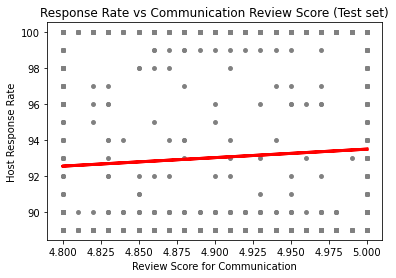

In [39]:
# Creating a plot that shows the regression line from the model on the test set.
# It seems the correlation, although postive, is not very strong.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Response Rate vs Communication Review Score (Test set)')
plot_test.xlabel('Review Score for Communication')
plot_test.ylabel('Host Response Rate')
plot_test.show()

In [40]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [41]:
# Printing the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.7342004]]
Mean squared error:  27.09520003573448
R2 score:  0.004927505275547972


### COMMENTS/CONCLUSION

> ##### When dropping some of the data and zooming in to explore the relationship within the main part of the data, I still come to the same conclusion; there is not a strong correlation between the host response rate and the review score for communication. 

> ##### The model performed poorly and this means I should focus on other variables and find other correlation / relationships in the data. 

# 7. Hypothesis & Scatterplot (B)

### HYPOTHESIS: "If a listing has a more reviews, then its price per night will be higher." 


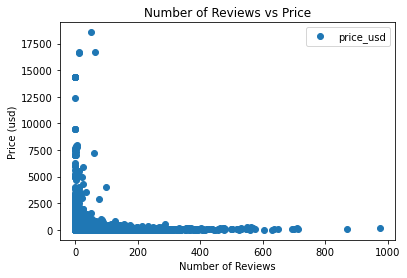

In [45]:
# Creating a scatterplot to explore the relationship between number of reviews & price. 

df.plot(x = 'number_of_reviews', y = 'price_usd',style='o')
plt.title('Number of Reviews vs Price')  
plt.xlabel('Number of Reviews')  
plt.ylabel('Price (usd)')  
plt.show()

/Users/charliegehant/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_reviews', ylabel='Density'>

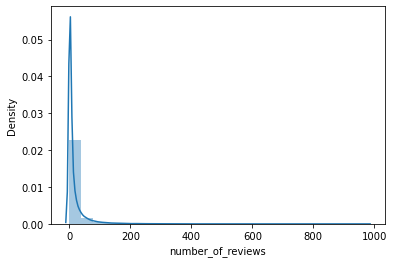

In [47]:
# Looking for extreme values

sns.distplot(df['number_of_reviews'], bins=25)

In [49]:
# Checking the data
# 50% of listings have 3 or less reviews, 75% of listings have 14 or less reviews. 

df['number_of_reviews'].describe()

count    66582.000000
mean        15.653705
std         36.787570
min          0.000000
25%          0.000000
50%          3.000000
75%         14.000000
max        974.000000
Name: number_of_reviews, dtype: float64

In [88]:
# Checking the data (head & tail)

df['number_of_reviews'].sort_values(ascending=False)

21951    974
1672     868
1673     713
8783     711
2151     699
        ... 
21992      0
53777      0
53776      0
21993      0
66581      0
Name: number_of_reviews, Length: 66582, dtype: int64

In [110]:
# Almost a third of the data (listings) have zero ratings

df['number_of_reviews'].value_counts().sort_index().head(10)

0    18539
1     7920
2     4768
3     3533
4     2688
5     2238
6     1870
7     1594
8     1397
9     1189
Name: number_of_reviews, dtype: int64

/Users/charliegehant/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_usd', ylabel='Density'>

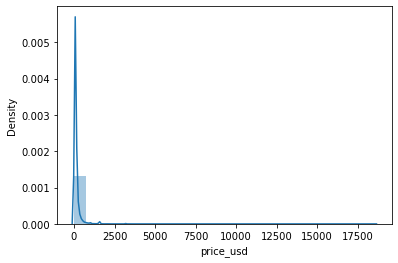

In [108]:
# Looking for extreme values

sns.distplot(df['price_usd'], bins=25)

In [52]:
# Checking the data
# The average price per night is $145 but half of the listings are $83 or less

df['price_usd'].describe()

count    66582.000000
mean       145.264501
std        350.056700
min          0.000000
25%         46.000000
50%         83.000000
75%        145.000000
max      18557.000000
Name: price_usd, dtype: float64

In [113]:
# Checking the data

df['price_usd'].sort_values(ascending=False)

25441    18557.0
17420    16706.0
41442    16696.0
38032    16631.0
51978    14360.0
          ...   
55189        0.0
50941        0.0
51882        0.0
51712        0.0
50291        0.0
Name: price_usd, Length: 66582, dtype: float64

In [119]:
# Checking the data
# Only 21 listing at $0 (insignificant for analysis)

df['price_usd'].value_counts().sort_index().head(10)

0.0      21
7.0       2
8.0      28
9.0       1
10.0     56
11.0      7
12.0     15
13.0     17
14.0     22
15.0    111
Name: price_usd, dtype: int64

In [115]:
# Checking the data
# A few luxury / extremely expensive listings

df['price_usd'].value_counts().sort_index().tail(10)

7800.0     1
7852.0     1
8000.0     1
9428.0     4
12345.0    1
14360.0    9
16631.0    1
16696.0    1
16706.0    1
18557.0    1
Name: price_usd, dtype: int64

# 8. Regression Analysis (B)


In [59]:
# Step 1: Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df['number_of_reviews'].values.reshape(-1,1)
y = df['price_usd'].values.reshape(-1,1)

In [60]:
# Step 2: Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
# Creating a regression object.

regression = LinearRegression() 

In [63]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [64]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

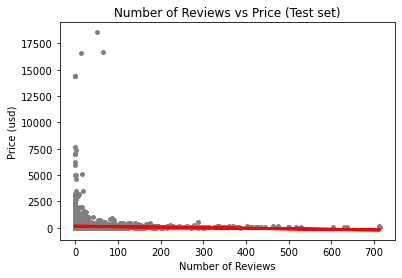

In [65]:
# Creating a plot that shows the regression line from the model on the test set.
# It seems the correlation is negative! (but very weak)

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Reviews vs Price (Test set)')
plot_test.xlabel('Number of Reviews')
plot_test.ylabel('Price (usd)')
plot_test.show()

In [66]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [67]:
# Printing the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.49590147]]
Mean squared error:  142881.06201209754
R2 score:  0.0015193529146125817


### COMMENTS

> ##### The slope is negative, therefore there is a negative relationship between Number of Reviews & Price.

> ##### The MSE is very high, meaning the regression line is a poor representation of the data.

> ##### The R2 score is very low, which means the model is a poor fit.

# 9. Performance Improvement (B)

In [96]:
# Isolating only listings priced below $250
# $250 seems like a reasonable high threshold for an average listing

df_A = df[df['price_usd'] <= 250]

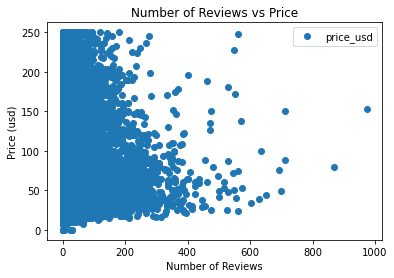

In [99]:
# Creating a scatterplot to explore the relationship between number of reviews & price. 

df_A.plot(x = 'number_of_reviews', y = 'price_usd',style='o')
plt.title('Number of Reviews vs Price')  
plt.xlabel('Number of Reviews')  
plt.ylabel('Price (usd)')  
plt.show()

In [100]:
# Step 1: Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df_A['number_of_reviews'].values.reshape(-1,1)
y = df_A['price_usd'].values.reshape(-1,1)

In [101]:
# Step 2: Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [102]:
# Creating a regression object.

regression = LinearRegression() 

In [103]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [104]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

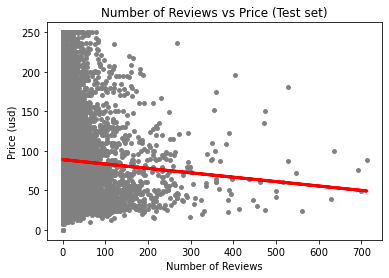

In [105]:
# Creating a plot that shows the regression line from the model on the test set.
# It seems the correlation is still negative and stronger!

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Reviews vs Price (Test set)')
plot_test.xlabel('Number of Reviews')
plot_test.ylabel('Price (usd)')
plot_test.show()

In [106]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [107]:
# Printing the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.05564172]]
Mean squared error:  2997.8433844536926
R2 score:  0.00124851125592218


### COMMENTS

> ##### Here I come to the same conclusions again, therefor my hypothesis is rejected.

> ##### This means that the number of reviews does not affect the price per night postively, if anything if affects it negatively. 

> ##### We could extrapolate that the competition is fierce and therefore hosts with more reviews put their prices a little lower than average to attract more bookings.